<a href="https://colab.research.google.com/github/Pavel20011987/Algorithms/blob/master/%5BGB%5D_bootcamp_analytics_day1_netflix_recommendation_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Визуальный анализ данных с помощью Python

1. Проанализировать текущий набор данных
2. Составить систему рекомендаций для пользователей

## Кто я?

Я Юлия Пономарева, инженер машинного обучения. Дарую зрение машинам и повышаю выручку компаний.


<img src='https://img.huffingtonpost.com/asset/56e1d7211e00008700703bfb.png?cache=g9ZpCoYOAJ&ops=1778_1000' width=500>


- Система распознавания товаров и ценников по фотографии
- Предсказание выгодной локации для торговой точки
- Система расчета рыночной цены объектов недвижимости
- Анализ факторов на выручку



## Где мы?

Google colab - интерактивная среда разработки jupyter notebook.

Если что про него [здесь](https://youtu.be/UenbX_7qYeI) 

## Netflix

Netflix - это стриминговый сервис, который постоянно растет, развивается и набирает больше популярности. 

Проведем разведочный анализ данных (EDA) с множеством интересных и полезных визуализаций, а также построим рекомендательную систему.

<img src='https://www.digiseller.ru/preview/1060574/p1_3307314_a2d40208.gif'>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

https://www.kaggle.com/datasets/shivamb/netflix-shows

In [ ]:
!wget 'https://drive.google.com/uc?id=1cunfb3ij7N1aRIhmlx6dXhiQfpecphrc' -O netflix_titles.csv 

--2022-06-27 11:30:59--  https://drive.google.com/uc?id=1cunfb3ij7N1aRIhmlx6dXhiQfpecphrc
Resolving drive.google.com (drive.google.com)... 172.217.203.101, 172.217.203.139, 172.217.203.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m0qeh7tl0laujhrrb38q5v1ie8ateh92/1656329400000/14904333240138417226/*/1cunfb3ij7N1aRIhmlx6dXhiQfpecphrc [following]
--2022-06-27 11:31:00--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m0qeh7tl0laujhrrb38q5v1ie8ateh92/1656329400000/14904333240138417226/*/1cunfb3ij7N1aRIhmlx6dXhiQfpecphrc
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)|172.217.2

In [ ]:
netflix_overall = pd.read_csv("netflix_titles.csv")
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


В данных есть 12 признаков для анализа.

In [ ]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

In [ ]:
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

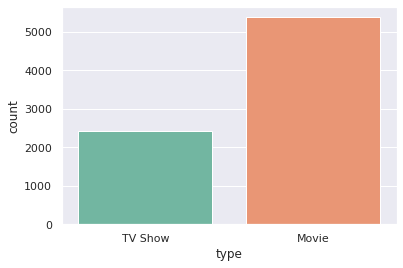

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

Получается, что фильмов гораздо больше, чем сериалов на Netflix.

# Популярное время длительности

In [ ]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [ ]:
from plotly import graph_objects as go

fig = go.Figure([
        go.Bar(x=topdirs.index, y=topdirs.values, text=topdirs.values, marker_color='indianred')
])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

# Анализ фильмов

## Какой месяц, самый привлекательный для релиза контента? 

Месяц с наименьшим количеством контента.

In [ ]:
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [ ]:
netflix_date.head()

,date_added
0,"August 14, 2020"
5,"July 1, 2017"
11,"November 30, 2018"
12,"May 17, 2019"
16,"March 20, 2019"


In [ ]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
0,"August 14, 2020",2020,August
5,"July 1, 2017",2017,July
11,"November 30, 2018",2018,November
12,"May 17, 2019",2019,May
16,"March 20, 2019",2019,March


In [ ]:
netflix_date.sort_values(by=['year', 'month'])

,date_added,year,month
1765,"February 4, 2008",2008,February
1089,"August 2, 2013",2013,August
3098,"March 31, 2013",2013,March
2503,"October 8, 2013",2013,October
5312,"October 14, 2013",2013,October
...,...,...,...
6203,"January 1, 2021",2021,January
6438,"January 1, 2021",2021,January
6477,"January 8, 2021",2021,January
6634,"January 15, 2021",2021,January


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0


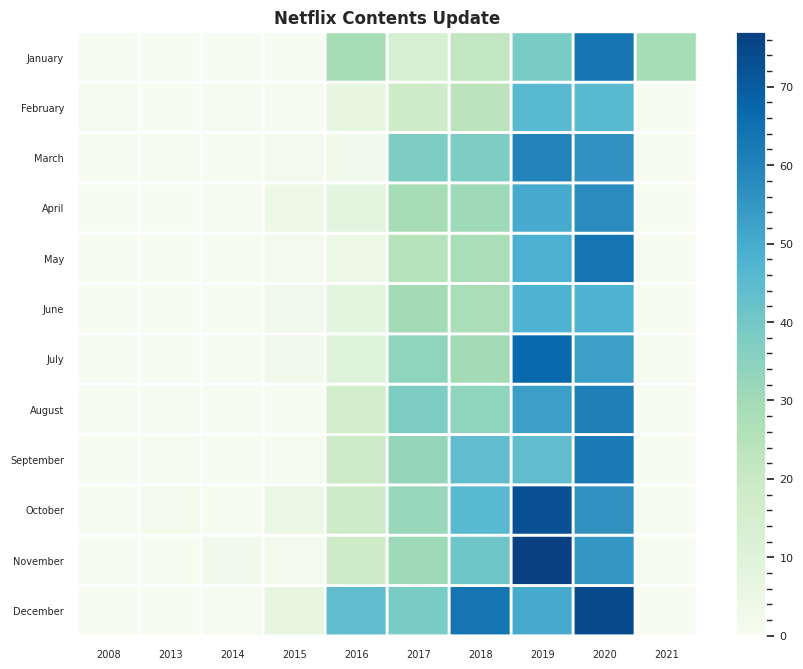

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
plt.pcolor(df, cmap='GnBu', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

В 2019 году в январе и декабре было выпущено достаточно мало контента, хотя эти месяцы очень прибыльные.

## Анализ рейтингов фильмов

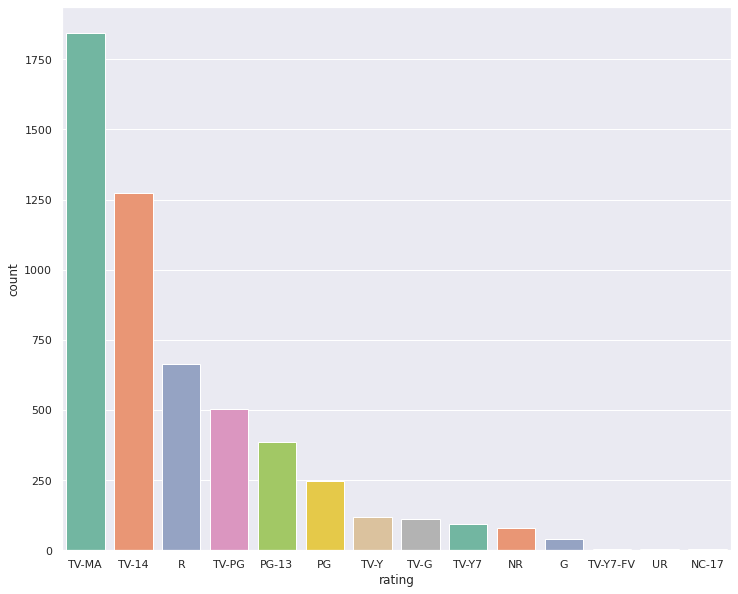

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

1. TV-MA - Самая большая группа. Такой рейтинг дается фильмам только для взрослой аудитории.
2. TV-14 - Вторая группа по величине. Контент фильма с таким рейтингом не подходит для детей младше 14 лет.
3. R - Фильмы не подходят для просмотра детям до 17 лет.

## Анализ года выпуска фильма

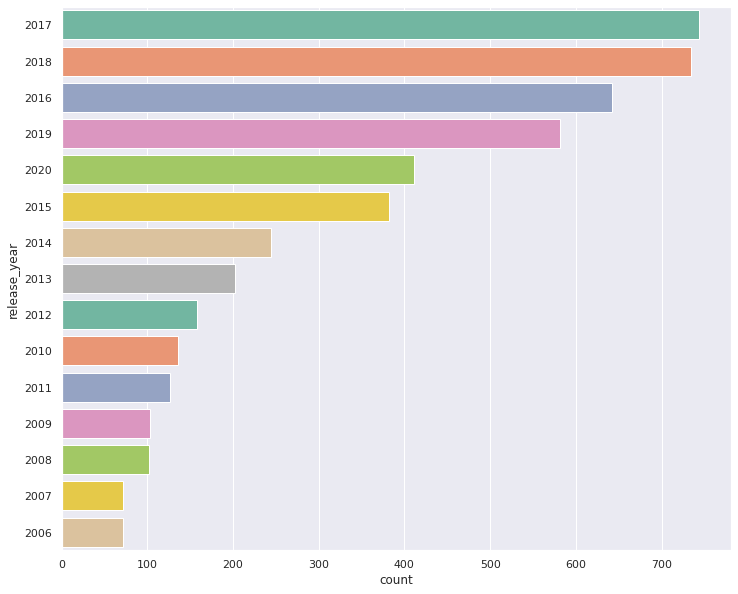

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

В 2017 выходило больше всего фильмов.

## Топ 10 стран, которые выпускают фильмы

In [ ]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
rating            5
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
netflix_movies['country'].fillna('Unknown').isna().sum()

0

In [ ]:
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country           0
date_added        0
release_year      0
rating            5
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
netflix_movies['country'].value_counts()

United States                                                   1850
India                                                            852
Unknown                                                          230
United Kingdom                                                   193
Canada                                                           118
                                                                ... 
United Kingdom, Denmark, Canada, Croatia                           1
United States, South Korea                                         1
Kenya, United States                                               1
India, Turkey                                                      1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 591, dtype: int64

In [ ]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))

    for j in i:
        if j in list(countries_mov.keys()):
            countries_mov[j]+=1
        else:
            countries_mov[j]=1

In [ ]:
countries_mov

{'': 4,
 'Afghanistan': 1,
 'Albania': 1,
 'Algeria': 2,
 'Angola': 1,
 'Argentina': 64,
 'Armenia': 1,
 'Australia': 84,
 'Austria': 10,
 'Bahamas': 1,
 'Bangladesh': 3,
 'Belgium': 74,
 'Bermuda': 1,
 'Botswana': 1,
 'Brazil': 59,
 'Bulgaria': 9,
 'Cambodia': 5,
 'Canada': 286,
 'CaymanIslands': 2,
 'Chile': 21,
 'China': 102,
 'Colombia': 17,
 'Croatia': 3,
 'CzechRepublic': 14,
 'Denmark': 31,
 'DominicanRepublic': 1,
 'EastGermany': 1,
 'Ecuador': 1,
 'Egypt': 97,
 'Finland': 7,
 'France': 265,
 'Georgia': 2,
 'Germany': 157,
 'Ghana': 4,
 'Greece': 8,
 'Guatemala': 2,
 'HongKong': 97,
 'Hungary': 8,
 'Iceland': 7,
 'India': 915,
 'Indonesia': 77,
 'Iran': 4,
 'Iraq': 2,
 'Ireland': 28,
 'Israel': 18,
 'Italy': 67,
 'Jamaica': 1,
 'Japan': 103,
 'Jordan': 7,
 'Kazakhstan': 1,
 'Kenya': 5,
 'Kuwait': 4,
 'Latvia': 1,
 'Lebanon': 19,
 'Liechtenstein': 1,
 'Lithuania': 1,
 'Luxembourg': 10,
 'Malawi': 1,
 'Malaysia': 18,
 'Malta': 2,
 'Mexico': 101,
 'Mongolia': 1,
 'Montenegro': 1,


In [ ]:
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)
countries_fin = countries_fin[:10]
countries_fin

[('UnitedStates', 2431),
 ('India', 915),
 ('UnitedKingdom', 467),
 ('Canada', 286),
 ('France', 265),
 ('Unknown', 230),
 ('Spain', 158),
 ('Germany', 157),
 ('Japan', 103),
 ('China', 102)]

In [ ]:
names = [name for name, value in countries_fin]
names

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Canada',
 'France',
 'Unknown',
 'Spain',
 'Germany',
 'Japan',
 'China']

In [ ]:
values = [value for name, value in countries_fin]
values

[2431, 915, 467, 286, 265, 230, 158, 157, 103, 102]

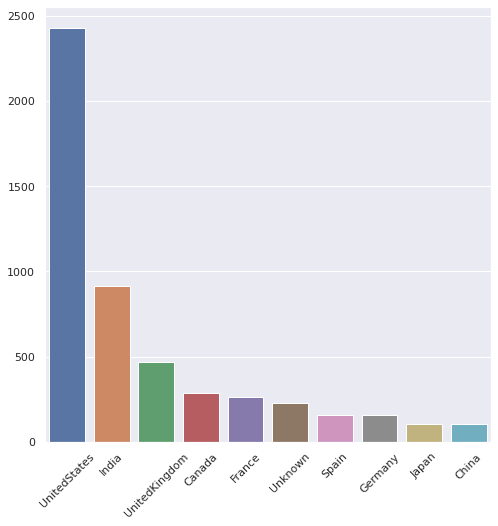

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45);

## Анализ продолжительности фильма

In [ ]:
netflix_movies['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [ ]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

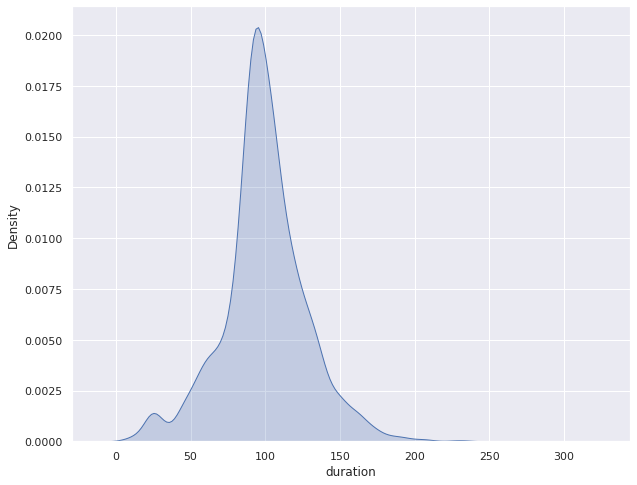

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=netflix_movies['duration'], shade=True);

Большое количество фильмов длятся 75-120 минут.

## Анализ жанров

In [ ]:
netflix_movies['listed_in']

1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
6                     Horror Movies, International Movies
                              ...                        
7781                   Children & Family Movies, Comedies
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 5377, dtype: object

1. Анализ вещественные
    1.1. Пропуск (до 5% nan - del)
    1.2 Пропуск больше 5% до 50% - заменять (mean, medianm mode)
    1.3 Выбросы (до 5% nan - del)
    1.4 50% - del
2. Анализа категориальные
3. Взаимное распределение

In [ ]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
        
g = Counter(gen)

In [ ]:
g 

Counter({'Action&Adventure': 721,
         'AnimeFeatures': 57,
         'Children&FamilyMovies': 532,
         'ClassicMovies': 103,
         'Comedies': 1471,
         'CultMovies': 59,
         'Documentaries': 786,
         'Dramas': 2106,
         'Faith&Spirituality': 57,
         'HorrorMovies': 312,
         'IndependentMovies': 673,
         'InternationalMovies': 2437,
         'LGBTQMovies': 90,
         'Movies': 56,
         'Music&Musicals': 321,
         'RomanticMovies': 531,
         'Sci-Fi&Fantasy': 218,
         'SportsMovies': 196,
         'Stand-UpComedy': 329,
         'Thrillers': 491})

In [ ]:
g = sorted(g.items(), key=lambda item: g[item[0]], reverse=True)
g

[('InternationalMovies', 2437),
 ('Dramas', 2106),
 ('Comedies', 1471),
 ('Documentaries', 786),
 ('Action&Adventure', 721),
 ('IndependentMovies', 673),
 ('Children&FamilyMovies', 532),
 ('RomanticMovies', 531),
 ('Thrillers', 491),
 ('Stand-UpComedy', 329),
 ('Music&Musicals', 321),
 ('HorrorMovies', 312),
 ('Sci-Fi&Fantasy', 218),
 ('SportsMovies', 196),
 ('ClassicMovies', 103),
 ('LGBTQMovies', 90),
 ('CultMovies', 59),
 ('Faith&Spirituality', 57),
 ('AnimeFeatures', 57),
 ('Movies', 56)]

In [ ]:
genre_names = [name for name, value in g]
genre_names

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Stand-UpComedy',
 'Music&Musicals',
 'HorrorMovies',
 'Sci-Fi&Fantasy',
 'SportsMovies',
 'ClassicMovies',
 'LGBTQMovies',
 'CultMovies',
 'Faith&Spirituality',
 'AnimeFeatures',
 'Movies']

In [ ]:
genre_values = [value for name, value in g]
genre_values

[2437,
 2106,
 1471,
 786,
 721,
 673,
 532,
 531,
 491,
 329,
 321,
 312,
 218,
 196,
 103,
 90,
 59,
 57,
 57,
 56]

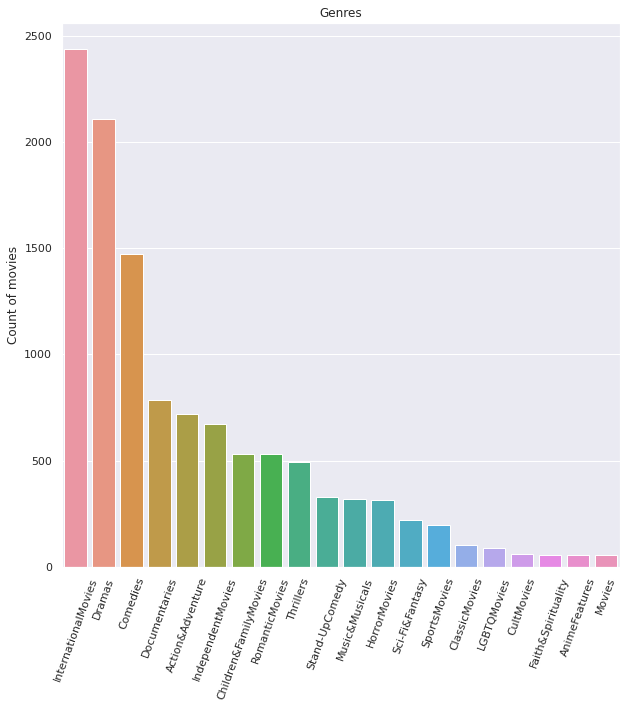

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel("Count of movies")
ax.set_title("Genres");

Интернациональные фильмы, драмы и комедии - топовые жанры.

# Анализ сериалов

## Анализ стран, выпускающих сериалы

In [ ]:
netflix_shows.shape

(2410, 12)

In [ ]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2226
cast             292
country          277
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_shows['country'].fillna('Unknown', inplace=True)
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2226
cast             292
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_shows['country'].value_counts()

United States                                                705
Unknown                                                      277
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: country, Length: 184, dtype: int64

In [ ]:
countries_show = {}

cou = list(netflix_shows['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(countries_show.keys()):
            countries_show[j]+=1
        else:
            countries_show[j]=1

In [ ]:
countries_show

{'Argentina': 18,
 'Australia': 60,
 'Austria': 1,
 'Azerbaijan': 1,
 'Belarus': 1,
 'Belgium': 11,
 'Brazil': 29,
 'Canada': 126,
 'Chile': 5,
 'China': 45,
 'Colombia': 28,
 'Croatia': 1,
 'Cuba': 1,
 'Cyprus': 1,
 'CzechRepublic': 6,
 'Denmark': 13,
 'Egypt': 13,
 'Finland': 4,
 'France': 84,
 'Germany': 42,
 'Greece': 2,
 'HongKong': 5,
 'Hungary': 1,
 'Iceland': 2,
 'India': 75,
 'Indonesia': 3,
 'Ireland': 12,
 'Israel': 8,
 'Italy': 23,
 'Japan': 184,
 'Jordan': 1,
 'Kuwait': 3,
 'Lebanon': 7,
 'Luxembourg': 1,
 'Malaysia': 8,
 'Malta': 1,
 'Mauritius': 1,
 'Mexico': 53,
 'Netherlands': 8,
 'NewZealand': 8,
 'Nigeria': 8,
 'Norway': 9,
 'Pakistan': 4,
 'Philippines': 1,
 'Poland': 8,
 'PuertoRico': 1,
 'Russia': 17,
 'SaudiArabia': 4,
 'Senegal': 1,
 'Singapore': 21,
 'SouthAfrica': 10,
 'SouthKorea': 157,
 'Spain': 57,
 'Sweden': 10,
 'Switzerland': 1,
 'Syria': 1,
 'Taiwan': 70,
 'Thailand': 22,
 'Turkey': 28,
 'Ukraine': 2,
 'UnitedArabEmirates': 1,
 'UnitedKingdom': 256,
 'U

In [ ]:
countries_fin2 = sorted(countries_show.items(), key=lambda item: countries_show[item[0]], reverse=True)
countries_fin2 = countries_fin2[:10]
countries_fin2

[('UnitedStates', 866),
 ('Unknown', 277),
 ('UnitedKingdom', 256),
 ('Japan', 184),
 ('SouthKorea', 157),
 ('Canada', 126),
 ('France', 84),
 ('India', 75),
 ('Taiwan', 70),
 ('Australia', 60)]

In [ ]:
names = [name for name, value in countries_fin2]
names

['UnitedStates',
 'Unknown',
 'UnitedKingdom',
 'Japan',
 'SouthKorea',
 'Canada',
 'France',
 'India',
 'Taiwan',
 'Australia']

In [ ]:
values = [value for name, value in countries_fin2]
values

[866, 277, 256, 184, 157, 126, 84, 75, 70, 60]

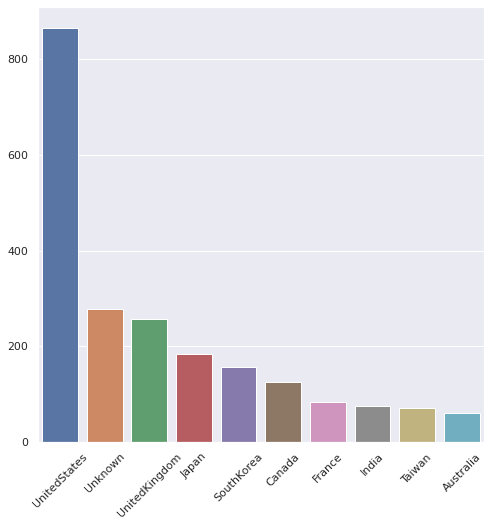

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45);

## Сериалы с большим количеством сезонов

In [ ]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
0,3%,4 Seasons
5,46,1 Season
11,1983,1 Season
12,1994,1 Season
16,Feb-09,1 Season
...,...,...
7767,Zindagi Gulzar Hai,1 Season
7775,Zoids Wild,1 Season
7777,Zombie Dumb,2 Seasons
7779,Zona Rosa,1 Season


In [ ]:
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')
durations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
0,3%,4 Seasons,4s
5,46,1 Season,1
11,1983,1 Season,1
12,1994,1 Season,1
16,Feb-09,1 Season,1
...,...,...,...
7767,Zindagi Gulzar Hai,1 Season,1
7775,Zoids Wild,1 Season,1
7777,Zombie Dumb,2 Seasons,2s
7779,Zona Rosa,1 Season,1


In [ ]:
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')
durations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
0,3%,4 Seasons,4
5,46,1 Season,1
11,1983,1 Season,1
12,1994,1 Season,1
16,Feb-09,1 Season,1
...,...,...,...
7767,Zindagi Gulzar Hai,1 Season,1
7775,Zoids Wild,1 Season,1
7777,Zombie Dumb,2 Seasons,2
7779,Zona Rosa,1 Season,1


In [ ]:
durations['no_of_seasons'] = durations['no_of_seasons'].astype(int)
durations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
0,3%,4 Seasons,4
5,46,1 Season,1
11,1983,1 Season,1
12,1994,1 Season,1
16,Feb-09,1 Season,1
...,...,...,...
7767,Zindagi Gulzar Hai,1 Season,1
7775,Zoids Wild,1 Season,1
7777,Zombie Dumb,2 Seasons,2
7779,Zona Rosa,1 Season,1


In [ ]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)

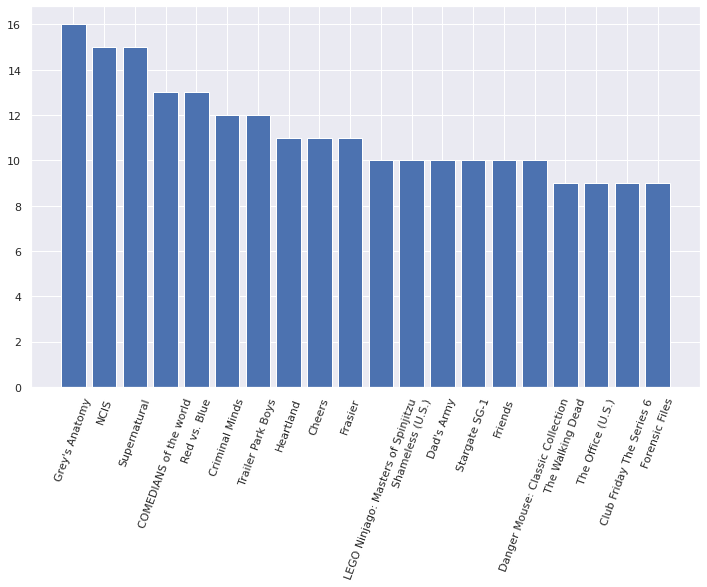

In [ ]:
top20 = top[0:20]
plt.figure(figsize=(12, 7))

plt.bar(top20['title'], top20['no_of_seasons'])
plt.xticks(top20['title'], rotation=70);

## Наименьшее количество сезонов

In [ ]:
bottom = top.sort_values(by='no_of_seasons')
bottom = bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(
    data=[
          go.Table(header=dict(values=['Title', 'No of seasons']),
                   cells=dict(values=[bottom['title'], bottom['no_of_seasons']]))
          ]
)
fig.show()

## Анализ жанров

In [ ]:
netflix_shows['listed_in']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
5         International TV Shows, TV Dramas, TV Mysteries
11      Crime TV Shows, International TV Shows, TV Dramas
12      Crime TV Shows, Docuseries, International TV S...
16                      International TV Shows, TV Dramas
                              ...                        
7767    International TV Shows, Romantic TV Shows, TV ...
7775                               Anime Series, Kids' TV
7777               Kids' TV, Korean TV Shows, TV Comedies
7779    International TV Shows, Spanish-Language TV Sh...
7785                   International TV Shows, Reality TV
Name: listed_in, Length: 2410, dtype: object

In [ ]:
from collections import Counter

genres = list(netflix_shows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
        
g = Counter(gen)

In [ ]:
g = sorted(g.items(), key=lambda item: g[item[0]], reverse=True)
g

[('InternationalTVShows', 1199),
 ('TVDramas', 704),
 ('TVComedies', 525),
 ('CrimeTVShows', 427),
 ("Kids'TV", 414),
 ('Docuseries', 353),
 ('RomanticTVShows', 333),
 ('BritishTVShows', 232),
 ('RealityTV', 222),
 ('KoreanTVShows', 150),
 ('TVAction&Adventure', 150),
 ('AnimeSeries', 148),
 ('Spanish-LanguageTVShows', 147),
 ('TVMysteries', 90),
 ('Science&NatureTV', 85),
 ('TVSci-Fi&Fantasy', 76),
 ('TVHorror', 69),
 ('TeenTVShows', 60),
 ('Stand-UpComedy&TalkShows', 52),
 ('TVThrillers', 50),
 ('Classic&CultTV', 27),
 ('TVShows', 12)]

In [ ]:
genre_names = [name for name, value in g]
genre_names

['InternationalTVShows',
 'TVDramas',
 'TVComedies',
 'CrimeTVShows',
 "Kids'TV",
 'Docuseries',
 'RomanticTVShows',
 'BritishTVShows',
 'RealityTV',
 'KoreanTVShows',
 'TVAction&Adventure',
 'AnimeSeries',
 'Spanish-LanguageTVShows',
 'TVMysteries',
 'Science&NatureTV',
 'TVSci-Fi&Fantasy',
 'TVHorror',
 'TeenTVShows',
 'Stand-UpComedy&TalkShows',
 'TVThrillers',
 'Classic&CultTV',
 'TVShows']

In [ ]:
genre_values = [value for name, value in g]
genre_values

[1199,
 704,
 525,
 427,
 414,
 353,
 333,
 232,
 222,
 150,
 150,
 148,
 147,
 90,
 85,
 76,
 69,
 60,
 52,
 50,
 27,
 12]

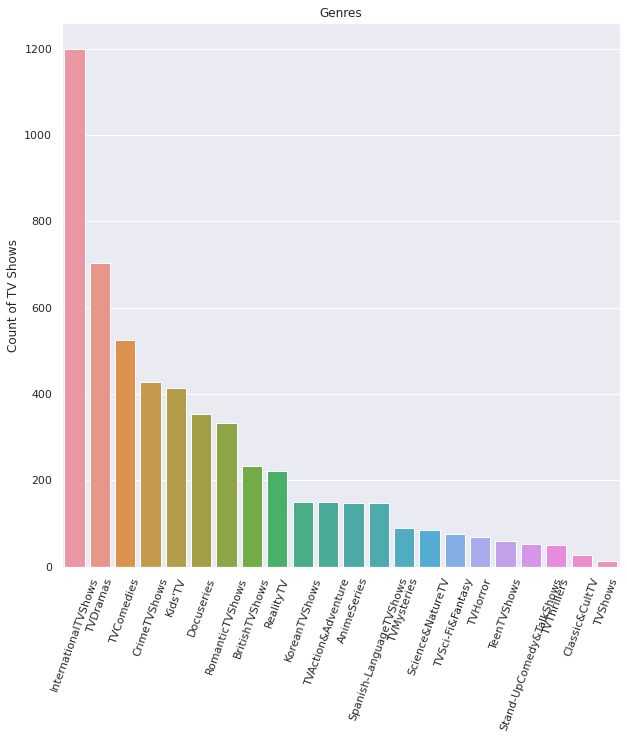

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel("Count of TV Shows")
ax.set_title("Genres");

Интернациональные сериалы, драмы и комедии - топовые жанры.

## Анализ продолжительности сериала

In [ ]:
durations[t]

,title,no_of_seasons
0,3%,4
5,46,1
11,1983,1
12,1994,1
16,Feb-09,1
...,...,...
7767,Zindagi Gulzar Hai,1
7775,Zoids Wild,1
7777,Zombie Dumb,2
7779,Zona Rosa,1


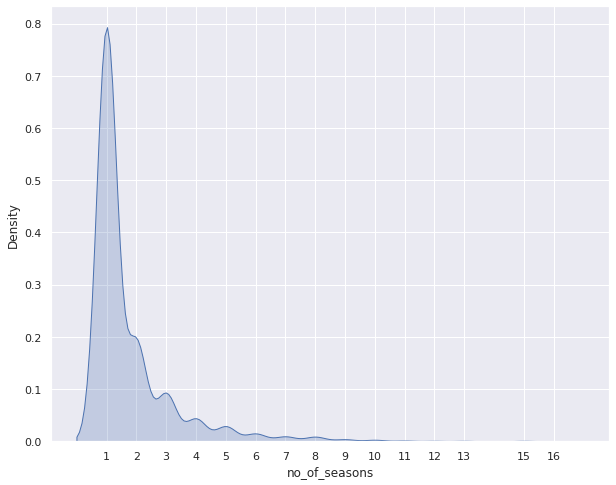

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=durations['no_of_seasons'], shade=True)
plt.xticks(sorted(durations['no_of_seasons'].unique()));

# Система рекомендаций (content based)

<img src='https://drive.google.com/uc?id=1H8rUnZV3RMbOO4HnNpZrjpYIOzy0ArrV' width=300>

In [ ]:
netflix_movies['description']

1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
6       After an awful accident, a couple admitted to ...
                              ...                        
7781    Dragged from civilian life, a former superhero...
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7786    This documentary delves into the mystique behi...
Name: description, Length: 5377, dtype: object

https://ru.wikipedia.org/wiki/TF-IDF

<img src='https://drive.google.com/uc?export=view&id=14nvoZ71VqMfYBY6ff_7_Btx-tVwL_4lB'>

Wifi access required<br>
My computer does not connect to wifi<br>
My Computer freezes<br>
What is a computer virus?

<table>
<tr>
<td>#</td><td><b>wifi</b></td><td><b>access</b></td><td><b>require</b></td><td><b>computer</b></td><td><b>freeze</b></td><td><b>virus</b></td>
</tr>

<tr>
<td><b>1</b></td><td>1</td><td>1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>

<tr>
<td><b>2</b></td><td>1</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>

<tr>
<td><b>3</b></td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>

<tr>
<td><b>4</b></td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td>
</tr>

</table>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
netflix_movies['description'].isna().sum()

0

In [ ]:
# netflix_movies['description'] = netflix_movies['description'].fillna('')
# netflix_movies['description'].isna().sum()

In [ ]:
netflix_movies['description'].head()

1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
6    After an awful accident, a couple admitted to ...
Name: description, dtype: object

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_movies['description'])

tfidf_matrix.shape

(5377, 14601)

In [ ]:
tfidf_matrix

<5377x14601 sparse matrix of type '<class 'numpy.float64'>'
	with 73930 stored elements in Compressed Sparse Row format>

Здесь 14601 слов, которые описывают 5377 фильмов.

In [ ]:
pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf.get_feature_names_out())

,000,007,10,100,1000,10th,11,112,11th,12,...,zuhu,zurich,álex,álvaro,ángel,émile,über,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Косинусная похожесть

<img src='https://drive.google.com/uc?id=1sp8Hfr1H8YKdo6KQHhvK42VPtzzJJczk'>

<img src='https://i.stack.imgur.com/36r1U.png'>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.09305242,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.07593931, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.07593931, ..., 1.        , 0.        ,
        0.        ],
       [0.09305242, 0.        , 0.        , ..., 0.        , 1.        ,
        0.02580113],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02580113,
        1.        ]])

In [ ]:
cosine_sim.shape

(5377, 5377)

In [ ]:
indices = pd.Series(netflix_movies.index, index=netflix_movies['title']).drop_duplicates()
indices

title
7:19                                          1
23:59                                         2
9                                             3
21                                            4
122                                           6
                                           ... 
Zoom                                       7781
Zozo                                       7782
Zubaan                                     7783
Zulu Man in Japan                          7784
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    7786
Length: 5377, dtype: int64

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,7:19,23:59,9,21,122,187,706,1920,1922,"2,215",...,Zoé: Panoramas,Zodiac,Zokkomon,Zombieland,Zoo,Zoom,Zozo,Zubaan,Zulu Man in Japan,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
title,,,,,,,,,,,,,,,,,,,,,
7:19,1.0,0.0,0.000000,0.000000,0.0,0.027618,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.016381,0.0,0.000000,0.093052,0.0
23:59,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.042022,0.000000,0.0,0.000000,0.000000,0.0
9,0.0,0.0,1.000000,0.029333,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.023371,0.000000,0.000000,0.0,0.075939,0.000000,0.0
21,0.0,0.0,0.029333,1.000000,0.0,0.037268,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
122,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.041665,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim_df):
    idx = indices[title]
    # Получаем похожести для этого фильма
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))

    # Сортируем фильмы, основываясь на похожести
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    # Получаем индексы фильма
    movie_indices = [i[0] for i in sim_scores]

    return netflix_movies['title'].iloc[movie_indices]

Рекомендации, основанные на сюжете.

In [ ]:
netflix_movies[netflix_movies['title'] == 'Last Breath'].description.iloc[0]

'A commercial diver becomes trapped on the ocean floor with dwindling oxygen and little hope of a timely rescue, so he tries to save himself.'

In [ ]:
get_recommendations('Last Breath')

2972                                          In The Deep
4111                                               Mine 9
1325                                       Chicken Little
4537                               NOVA: Thai Cave Rescue
4332    My Little Pony Equestria Girls: Legend of Ever...
905                                           Big Miracle
4916                                              Posesif
5411                                        Savage Raghda
1846                              Dragon Quest Your Story
5289                                        Rowdy Rathore
Name: title, dtype: object

In [ ]:
netflix_movies[netflix_movies['title'] == 'Chicken Little'].description.iloc[0]

"No one believes Chicken Little when he tries to warn of an alien invasion – so it's up to him and his misfit friends to save the world!"

In [ ]:
cosine_sim_df['Last Breath'].sort_values(ascending=False)

title
Last Breath                                1.000000
In The Deep                                0.268544
Mine 9                                     0.154068
Chicken Little                             0.144467
NOVA: Thai Cave Rescue                     0.142818
                                             ...   
Hellboy                                    0.000000
Helios                                     0.000000
Heaven Without People                      0.000000
Heartthrob                                 0.000000
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    0.000000
Name: Last Breath, Length: 5377, dtype: float64